In [4]:
import numpy as np
import cv2
import pydicom
import json

# Dicom 파일 읽기
ds = pydicom.dcmread(r"C:\python\lung\hu_example\00000338.dcm")

# Dicom 파일의 pixel_array를 이미지로 변환
img = ds.pixel_array

# 이미지를 PNG 형식으로 저장
# cv2.imwrite("example.png", img)

# PNG 파일 읽기
img = cv2.imread(r"C:\python\lung\hu_example\00000338.png", cv2.IMREAD_GRAYSCALE)

# 폴리곤 영역 설정

with open(r'C:\python\lung\hu_example\00000338.json', 'r') as f:
    json_data = json.load(f)

points = json_data['shapes'][0]['points']

for i in points:
    i[0] = int(i[0])
    i[1] = int(i[1])

pts = np.array(json_data['shapes'][0]['points'])
print(pts)
# pts = np.array([[100, 100], [200, 100], [200, 200], [100, 200]])
mask = np.zeros_like(img)
cv2.fillPoly(mask, [pts], 255)

# 폴리곤 영역에 해당하는 범위의 평균 Hounsfield Unit 계산
mean_hu = np.mean(ds.pixel_array[mask == 255])

print("평균 Hounsfield Unit:", mean_hu)


[[192 224]
 [188 230]
 [188 236]
 [194 237]
 [190 241]
 [186 245]
 [181 244]
 [179 237]
 [176 228]
 [181 226]]
평균 Hounsfield Unit: 593.4232365145228


In [5]:
import json

with open(r'C:\python\lung\hu_example\00000338.json', 'r') as f:
    json_data = json.load(f)

json_data
# d = json.dumps(json_data)
# # print(json.dumps(json_data))
print(json_data['shapes'][0]['points'])

[[192.66666666666666, 224.14814814814815], [188.2222222222222, 230.07407407407408], [188.2222222222222, 236.0], [194.14814814814815, 237.4814814814815], [190.44444444444443, 241.92592592592592], [186.74074074074073, 245.62962962962965], [181.55555555555554, 244.14814814814815], [179.33333333333331, 237.4814814814815], [176.37037037037035, 228.5925925925926], [181.55555555555554, 226.37037037037038]]


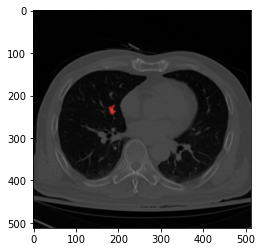

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

pic = np.zeros((512, 512, 3), np.uint8)

with open(r'C:\python\lung\hu_example\00000338.json', 'r') as f:
    json_data = json.load(f)

points = json_data['shapes'][0]['points']

for i in points:
    i[0] = int(i[0])
    i[1] = int(i[1])

pts = np.array(points)

# pts = np.array([[100, 100], [200, 100], [200, 200], [100, 200]])
cv2.fillPoly(pic, [pts], 255)

bgr_img = cv2.imread(r'C:\python\lung\hu_example\00000338.png')
mask_array = pts
added_image = cv2.addWeighted(bgr_img, 0.5, pic, 0.5, gamma=0)

# cv2.imshow('pic', pic)
# cv2.imshow('add image', added_image)
# cv2.waitKey()

plt.imshow(added_image)